## SqueezeNet

In [1]:
%matplotlib inline
%load_ext autoreload
%autoreload 2
import sys
sys.path.append("/home/bfortuner/workplace/VisionQuest")
from common import *
from data import imagenet
import torch.onnx

## Dataset

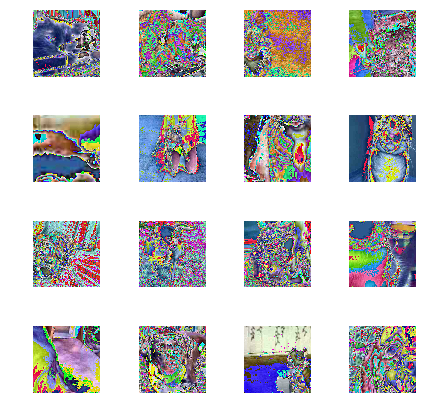

In [2]:
# Cats/Dogs
IMG_DIR = '/bigguy/data/dogscats/train/'
trn_loader, val_loader, classes = datasets.get_catsdogs_loader(IMG_DIR)
inputs,targets,img_paths = next(iter(trn_loader))
utils.imgs.plot_rgb_samples(inputs)

## Model

In [17]:
model = torchvision.models.squeezenet1_1(pretrained=True)
_ = model.eval()

In [18]:
model

SqueezeNet(
  (features): Sequential(
    (0): Conv2d (3, 64, kernel_size=(3, 3), stride=(2, 2))
    (1): ReLU(inplace)
    (2): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dilation=(1, 1))
    (3): Fire(
      (squeeze): Conv2d (64, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d (16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d (16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (4): Fire(
      (squeeze): Conv2d (128, 16, kernel_size=(1, 1), stride=(1, 1))
      (squeeze_activation): ReLU(inplace)
      (expand1x1): Conv2d (16, 64, kernel_size=(1, 1), stride=(1, 1))
      (expand1x1_activation): ReLU(inplace)
      (expand3x3): Conv2d (16, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (expand3x3_activation): ReLU(inplace)
    )
    (5): MaxPool2d(kernel_size=(3, 3), stride=(2, 2), dila

## Train

In [10]:
classes = imagenet.CLASSES

In [13]:
inputs,targets,img_fpaths = next(iter(trn_loader))
output = model(Variable(inputs))
preds = predictions.get_argmax(output)

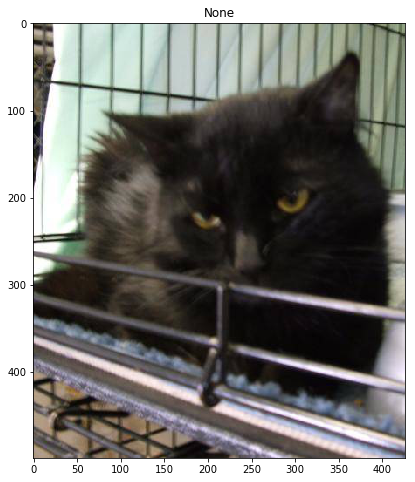

In [14]:
utils.imgs.plot_img_from_fpath(img_paths[0])

In [15]:
for i in range(len(img_fpaths)):
    print(img_fpaths[i], classes[preds[i]])

/bigguy/data/dogscats/train/cat.6794.jpg ice bear, polar bear, Ursus Maritimus, Thalarctos maritimus
/bigguy/data/dogscats/train/cat.5435.jpg schipperke
/bigguy/data/dogscats/train/dog.2008.jpg golden retriever
/bigguy/data/dogscats/train/cat.1194.jpg Persian cat
/bigguy/data/dogscats/train/cat.7675.jpg cleaver, meat cleaver, chopper
/bigguy/data/dogscats/train/dog.12057.jpg Border collie
/bigguy/data/dogscats/train/dog.8575.jpg chow, chow chow
/bigguy/data/dogscats/train/dog.4581.jpg Irish setter, red setter
/bigguy/data/dogscats/train/dog.1805.jpg Tibetan terrier, chrysanthemum dog
/bigguy/data/dogscats/train/cat.11703.jpg Persian cat
/bigguy/data/dogscats/train/dog.4653.jpg Labrador retriever
/bigguy/data/dogscats/train/cat.2657.jpg Siamese cat, Siamese
/bigguy/data/dogscats/train/cat.995.jpg Cardigan, Cardigan Welsh corgi
/bigguy/data/dogscats/train/dog.4118.jpg Saint Bernard, St Bernard
/bigguy/data/dogscats/train/dog.1527.jpg American Staffordshire terrier, Staffordshire terrier,